___
# Project:10-Agricultural Predictions
___

In [1]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser
import wikipedia

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing in the dataset
df = pd.read_excel('train_agriculture.xlsx')

In [3]:
# head of the dataframe
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
# get the shape of the dataset
df.shape

(4599, 10)

In [5]:
# description of the dataset
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [6]:
# information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


* The dataset containes all the features in numerical value, except for the ID feature (which will be reoved by the way).

In [7]:
## Check for the missing values in the dataset

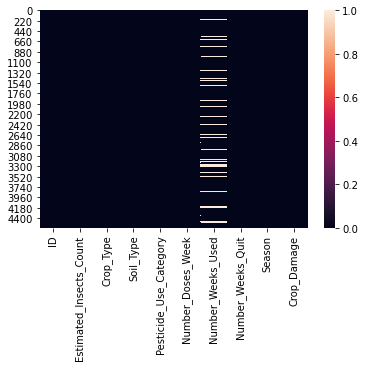

In [8]:
# plotting the heatmap is the best way to visualize missing value there is!
sns.heatmap(df.isna())

In [9]:
# now actuall stats
df.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [10]:
# percentage of missing values per dataset
df.isna().mean()

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          0.096108
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                0.000000
dtype: float64

In [11]:
# check for the correlation between the features of the dataset.
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


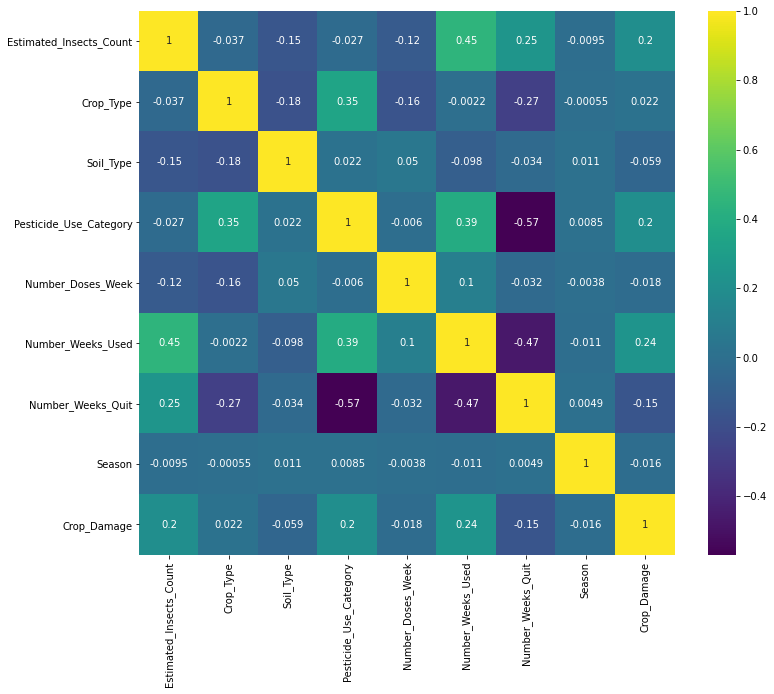

In [12]:
# bring up the heat..map
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(),annot=True,cmap='viridis')

Initial Infereces:
    * There are around 4.6K of samples in this dataset.
    * There are 9 features in totals and 1 target column
    * The target column is Crop_Damage.
    * Thus, the goal of the dataset is to predict if the crop will damaged or not.
    * There is only 1 column in the dataset which contains around 440 mising values 
    * There are no extremely highly correlated features in the dataset.

## Univariate Analysis

In [13]:
# let's crate a coppy of the raw dataframe for some mappings in visualizations.
df_viz = df.copy()

In [14]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

In [15]:
df_viz.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [16]:
# Estimated_Insects_Counts

* There is a real value which gives the count of insects per sq.m.

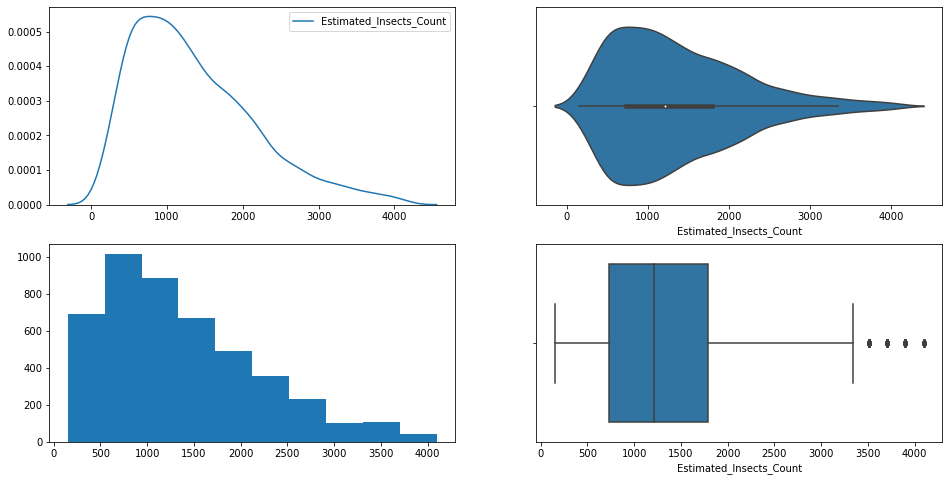

In [17]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df_viz.Estimated_Insects_Count)

fig.add_subplot(222)
sns.violinplot(df_viz.Estimated_Insects_Count,orient='h')

fig.add_subplot(223)
plt.hist(df_viz.Estimated_Insects_Count)

fig.add_subplot(224)
sns.boxplot(df_viz.Estimated_Insects_Count)

In [18]:
df_viz.Estimated_Insects_Count.describe()

count    4599.000000
mean     1363.000435
std       814.439120
min       150.000000
25%       731.000000
50%      1212.000000
75%      1786.000000
max      4097.000000
Name: Estimated_Insects_Count, dtype: float64

* Estimated_Insects_Count per square meter of area are around follow a sightly positively skewed normal distribution
* The more the number of insects the more chances of the crop being damaged. 

In [19]:
# let's check the regions with highest count of insects
df_viz.sort_values('Estimated_Insects_Count',ascending=False)[:500]['Crop_Damage'].value_counts()

0    327
1    151
2     22
Name: Crop_Damage, dtype: int64

In [20]:
# Crop type

* This feature gives the category of the crop.
* We have to types of crops, thus this is a binary type feature.

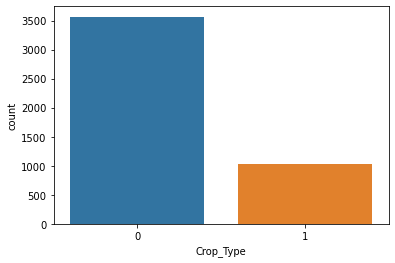

In [21]:
sns.countplot(df_viz.Crop_Type)

* We have to types of crop in this dataset.
* There are higher number of type 0 crops than type 1 crops

In [22]:
df_viz[df_viz.Crop_Type == 0]['Crop_Damage'].value_counts()

0    2979
1     498
2      88
Name: Crop_Damage, dtype: int64

In [23]:
# # Soil_type

* There are 2 types of soil , thus this a binary value.

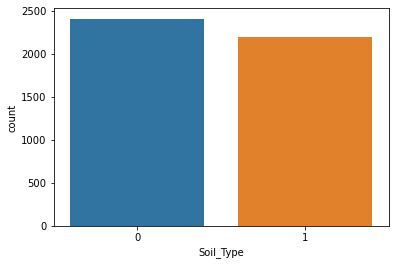

In [24]:
sns.countplot(df.Soil_Type)

* This is a pretty balanced feature.

In [25]:
# Pesticides_Use_Category

In [26]:
# mapping the respective values.
df_viz.Pesticide_Use_Category = df_viz.Pesticide_Use_Category.map({1:'Never_Used',2:'Previously_Used',3:'Currently Using'})

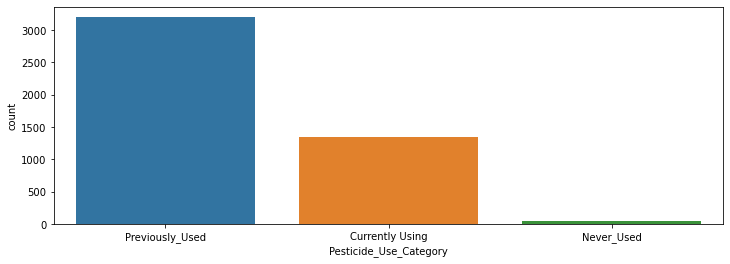

In [27]:
fig_this_size(12,4)
sns.countplot(df_viz.Pesticide_Use_Category,order=df_viz.Pesticide_Use_Category.value_counts().index)

* Most of the Agricultural Practioners used their previously used Pesticides for their practices.

In [28]:
# Number of Doses Per Week

* Number of doeses of pesticides given to the crops in a weeks interval.
* A real value feature type.

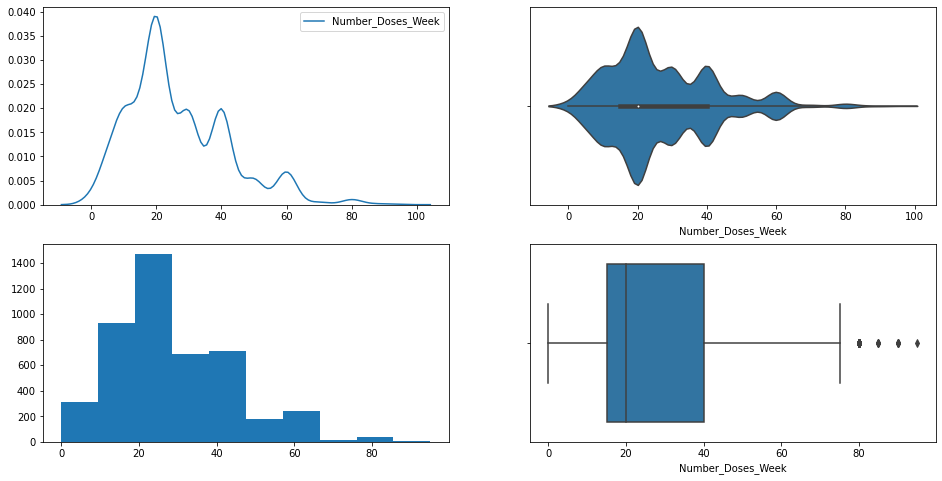

In [29]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df_viz.Number_Doses_Week)

fig.add_subplot(222)
sns.violinplot(df_viz.Number_Doses_Week,orient='h')

fig.add_subplot(223)
plt.hist(df_viz.Number_Doses_Week)

fig.add_subplot(224)
sns.boxplot(df_viz.Number_Doses_Week)

In [30]:
df.Number_Doses_Week.describe()

count    4599.000000
mean       26.477495
std        15.524647
min         0.000000
25%        15.000000
50%        20.000000
75%        40.000000
max        95.000000
Name: Number_Doses_Week, dtype: float64

In [31]:
stats.entropy(df.Number_Doses_Week)

8.265221351782044

In [32]:
stats.skew(df.Number_Doses_Week)

0.9455863453636739

In [33]:
stats.kurtosis(df.Number_Doses_Week)

0.8747876431298822

* Some outliers in the features are streching the knew of the feature.
* Has a more of a distorted disrtibution.

In [34]:
# Number of Weeks Used

* A count of total number of weeks the plant is injected/sprayed with the pesticide.

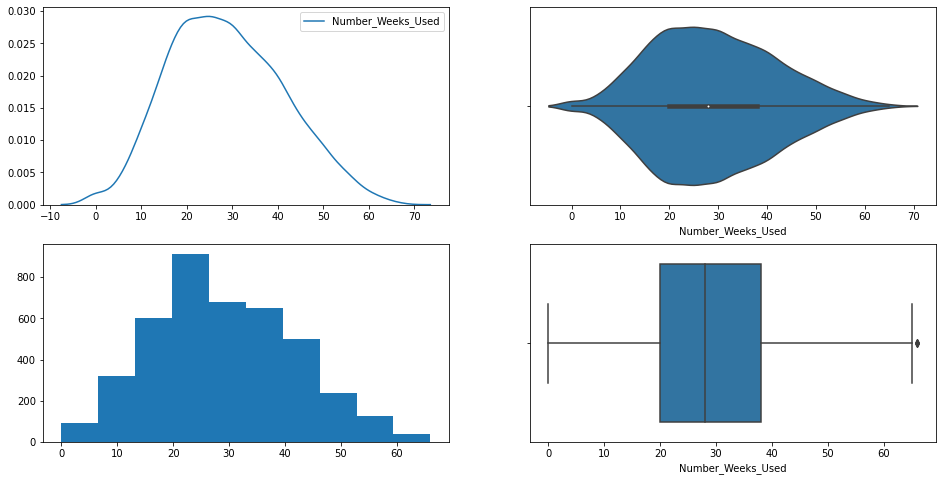

In [35]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df_viz.Number_Weeks_Used)

fig.add_subplot(222)
sns.violinplot(df_viz.Number_Weeks_Used,orient='h')

fig.add_subplot(223)
plt.hist(df_viz.Number_Weeks_Used)

fig.add_subplot(224)
sns.boxplot(df_viz.Number_Weeks_Used)

* One of the best feature you we say in this dataset so far.
* No outliers, follows a normal distribution.

In [36]:
# Number of weeks quit

* The count of number of weeks the crop isn't sprayed/injected with pesticide.

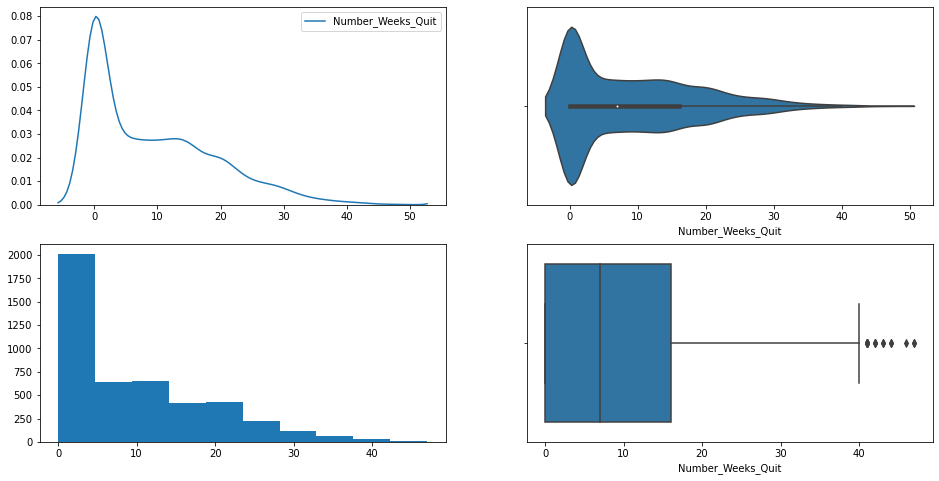

In [37]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df_viz.Number_Weeks_Quit)

fig.add_subplot(222)
sns.violinplot(df_viz.Number_Weeks_Quit,orient='h')

fig.add_subplot(223)
plt.hist(df_viz.Number_Weeks_Quit)

fig.add_subplot(224)
sns.boxplot(df_viz.Number_Weeks_Quit)

In [38]:
df.Number_Weeks_Quit.value_counts()[:5]/len(df)*100

0     32.528811
14     3.174603
2      3.152859
6      3.044140
12     2.978908
Name: Number_Weeks_Quit, dtype: float64

* Highly skewed distribution
* 32 percent of the total values are 0.

In [39]:
# Seasons

* The 3 seasons in which crops are grown.
* The three seasons are:
    * 1: Autumn
    * 2: Winter
    * 3: Summer

In [40]:
# mapping the data for more interpretable visualzation:
df_viz.Season = df_viz.Season.map({1: 'Autumn', 2: 'Winter', 3: 'Summer'})

In [41]:
df_viz.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,Never_Used,0,0.0,0,Autumn,0
1,F00000003,209,1,0,Never_Used,0,0.0,0,Winter,1
2,F00000004,257,1,0,Never_Used,0,0.0,0,Winter,1
3,F00000005,257,1,1,Never_Used,0,0.0,0,Winter,1
4,F00000006,342,1,0,Never_Used,0,0.0,0,Winter,1


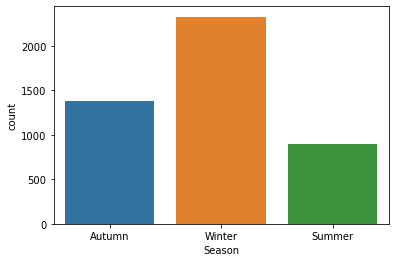

In [42]:
sns.countplot(df_viz.Season)

* Most of the crops are grown in the Winer Season.

In [43]:
# Crop Damage (Target Variable)

* Give the stats about if the crop is damaged or not, and If he crop is damaged, is it because of the Pesticides used or Something else.

In [44]:
df_viz.Crop_Damage = df_viz.Crop_Damage.map({0:'Alive',1:'Damage',2:'Damaged_coz_of_Pesticides'})

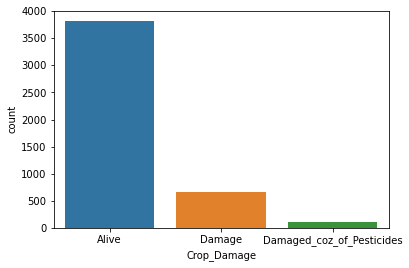

In [45]:
sns.countplot(df_viz.Crop_Damage)

In [46]:
df_viz.groupby('Crop_Damage')['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'].mean()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
Crop_Damage,,,,
Alive,1282.352094,26.692408,27.517172,9.841885
Damage,1772.251506,24.902108,35.217687,6.558735
Damaged_coz_of_Pesticides,1678.947826,28.434783,38.894231,3.347826


* <b>Inferences:</b>
    * We can see that on average the less the insects on the crop the better it's chances of survival.
    * If the pesticide is used for more than 35 weeks, the plant is llikely to die on average.
    * If the pesticide is used for more than 38 weeks, the plant is likely to die due to pesticide overdose.

## Multi-variate Analysis

In [47]:
# Let's get a new fearture Age of the Plants

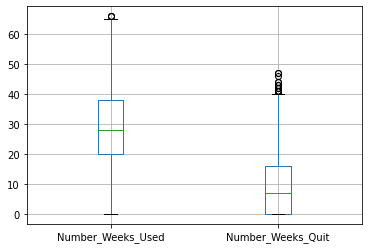

In [48]:
df[['Number_Weeks_Used','Number_Weeks_Quit']].boxplot()

In [49]:
df['Total_Weeks_Under_Dose'] = df['Number_Weeks_Quit'] + df['Number_Weeks_Used']
df_viz['Total_Weeks_Under_Dose'] = df['Total_Weeks_Under_Dose']

In [50]:
df_viz

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose
0,F00000001,188,1,0,Never_Used,0,0.0,0,Autumn,Alive,0.0
1,F00000003,209,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
2,F00000004,257,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
3,F00000005,257,1,1,Never_Used,0,0.0,0,Winter,Damage,0.0
4,F00000006,342,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,Previously_Used,20,NaN,1,Autumn,Damage,NaN
4595,F00008079,2139,0,1,Previously_Used,30,47.0,2,Autumn,Damage,49.0
4596,F00008080,2267,0,1,Previously_Used,10,7.0,27,Winter,Alive,34.0
4597,F00008082,2267,0,1,Previously_Used,10,20.0,24,Winter,Alive,44.0


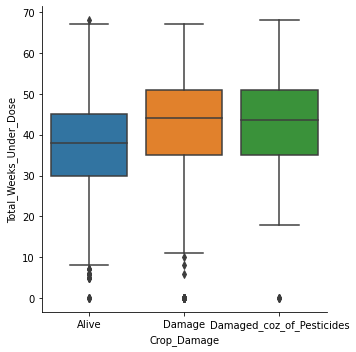

In [51]:
sns.catplot('Crop_Damage','Total_Weeks_Under_Dose',data=df_viz.dropna(),kind='box')

In [52]:
df_viz

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose
0,F00000001,188,1,0,Never_Used,0,0.0,0,Autumn,Alive,0.0
1,F00000003,209,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
2,F00000004,257,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
3,F00000005,257,1,1,Never_Used,0,0.0,0,Winter,Damage,0.0
4,F00000006,342,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,Previously_Used,20,NaN,1,Autumn,Damage,NaN
4595,F00008079,2139,0,1,Previously_Used,30,47.0,2,Autumn,Damage,49.0
4596,F00008080,2267,0,1,Previously_Used,10,7.0,27,Winter,Alive,34.0
4597,F00008082,2267,0,1,Previously_Used,10,20.0,24,Winter,Alive,44.0


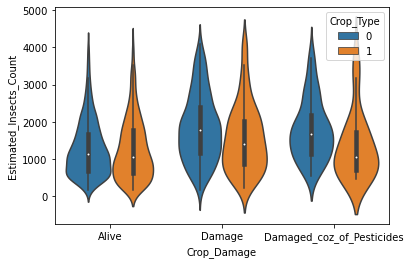

In [53]:
# crop damage vs insect count
sns.violinplot(df_viz.Crop_Damage,df_viz.Estimated_Insects_Count,hue=df_viz.Crop_Type)

* The probality for the crop to survive is higher if the Estimated Insect count is lower.

In [54]:
# Crop type vs Number of doses

* Are the doses given to the plants are according to the crop type? Let's find that out!

In [55]:
df['Total_Number_of_Doses'] = df.Number_Doses_Week * df.Number_Weeks_Used
df_viz['Total_Number_of_Doses'] = df['Total_Number_of_Doses']

In [56]:
df_viz

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose,Total_Number_of_Doses
0,F00000001,188,1,0,Never_Used,0,0.0,0,Autumn,Alive,0.0,0.0
1,F00000003,209,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0,0.0
2,F00000004,257,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0,0.0
3,F00000005,257,1,1,Never_Used,0,0.0,0,Winter,Damage,0.0,0.0
4,F00000006,342,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,Previously_Used,20,NaN,1,Autumn,Damage,NaN,NaN
4595,F00008079,2139,0,1,Previously_Used,30,47.0,2,Autumn,Damage,49.0,1410.0
4596,F00008080,2267,0,1,Previously_Used,10,7.0,27,Winter,Alive,34.0,70.0
4597,F00008082,2267,0,1,Previously_Used,10,20.0,24,Winter,Alive,44.0,200.0


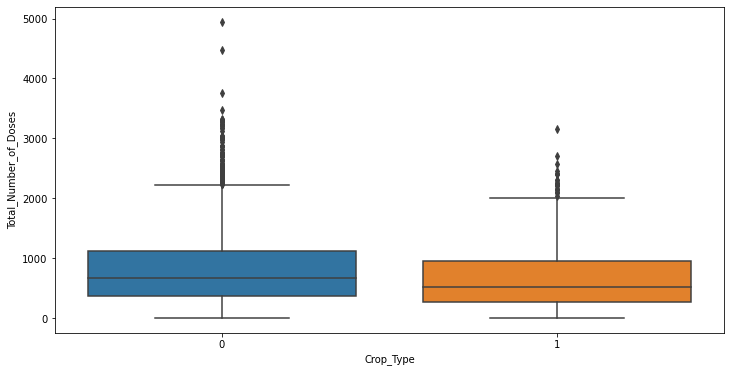

In [57]:
fig_this_size(12,6)
sns.boxplot(df.Crop_Type,df.Total_Number_of_Doses)

* The number of Doses given to the Crop type 0 are higher than type 1

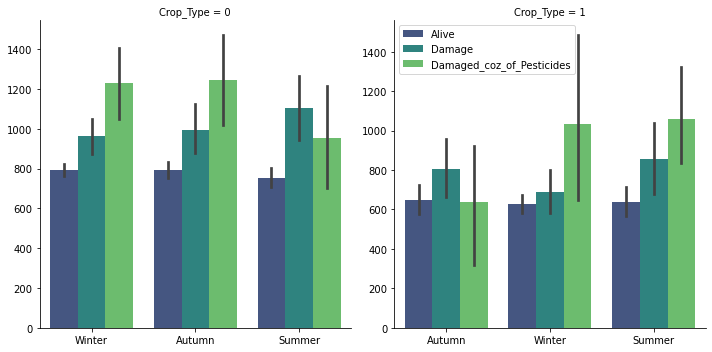

In [58]:
g = sns.FacetGrid(df_viz.dropna(),col='Crop_Type',height=5,sharex=False,sharey=False)
g.map_dataframe(sns.barplot,x='Season',y='Total_Number_of_Doses',hue='Crop_Damage',palette='viridis')
plt.legend()
plt.tight_layout()

* In the Winters, the Plant is more likely to die of excess of pesticides.
* Crop of type 0 , has the best chances of Being alive under high pesticides doses in winter.
* On Average Crop type 0 can handle around 800 doses without being damaged but Crop Type 1 can handle around 650 doeses without being damaged irrespective of the Season.

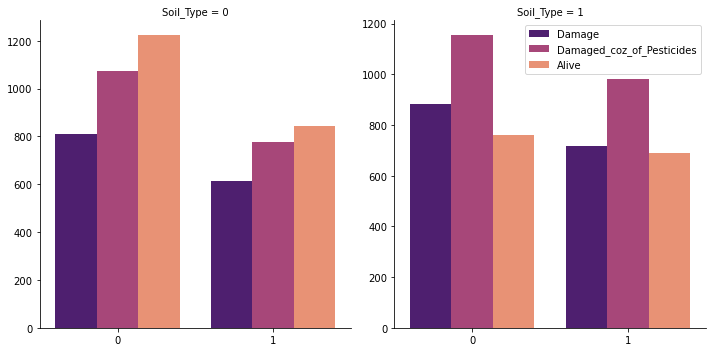

In [59]:
g = sns.FacetGrid(df_viz.dropna(),col='Soil_Type',height=5,sharex=False,sharey=False)
g.map_dataframe(sns.barplot,x='Crop_Type',y='Total_Number_of_Doses',hue='Crop_Damage',palette='magma',ci=None)
plt.legend()
plt.tight_layout()

* A crop can withstand more number of doses of pesticides if it is planted in Soil 0 rather Than Soil 1.
* Crops planted in Soild 2 will get damaged quickly with even with less number of doses, an the reason from damage would be mostly exess pesticide sprayes.

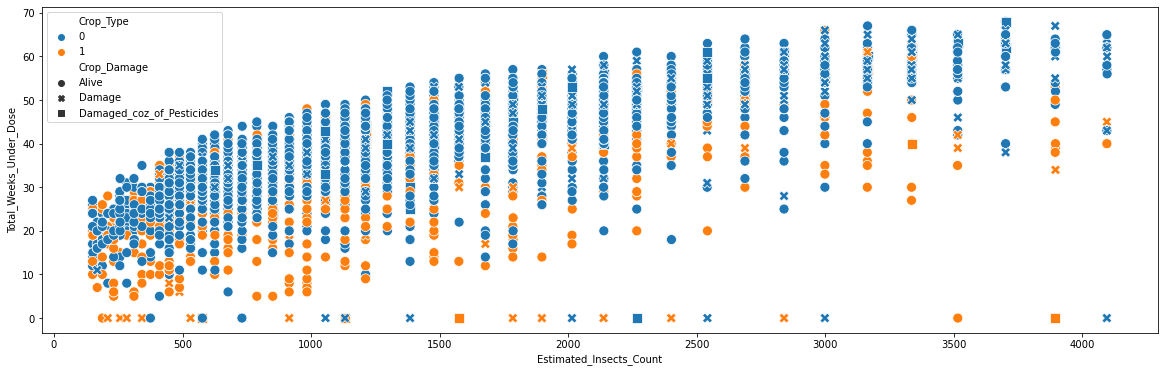

In [60]:
fig_this_size(20,6)
sns.scatterplot(df.Estimated_Insects_Count,df.Total_Weeks_Under_Dose,hue=df.Crop_Type,s=100,palette='tab10',style=df_viz.Crop_Damage)

* As the number of Instect Count Increases, the number of week under does (Weeks_used + Weeks quit) increase.
* Again we can see that The doses give to the crop type 0 is greate than type 1.
* There are also some plants to whom doses were never given, most of them did'nt make it alive.

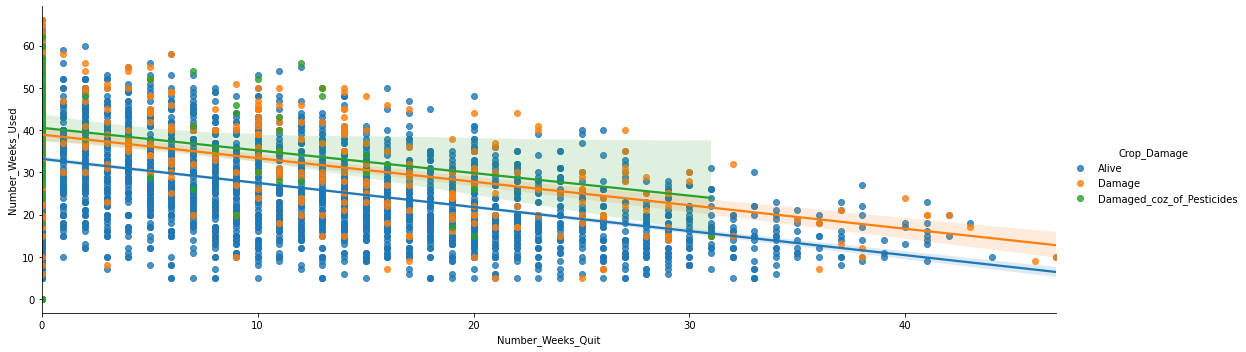

In [61]:
sns.lmplot('Number_Weeks_Quit','Number_Weeks_Used',data=df_viz,aspect=3,hue='Crop_Damage')

In [62]:
df_viz.Pesticide_Use_Category.value_counts()

Previously_Used    3205
Currently Using    1349
Never_Used           45
Name: Pesticide_Use_Category, dtype: int64

## Imputing the missing values

In [63]:
# creating another copy to modify the data and to train the model.
df_cleaned = df.copy()

In [64]:
df.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
Total_Weeks_Under_Dose     442
Total_Number_of_Doses      442
dtype: int64

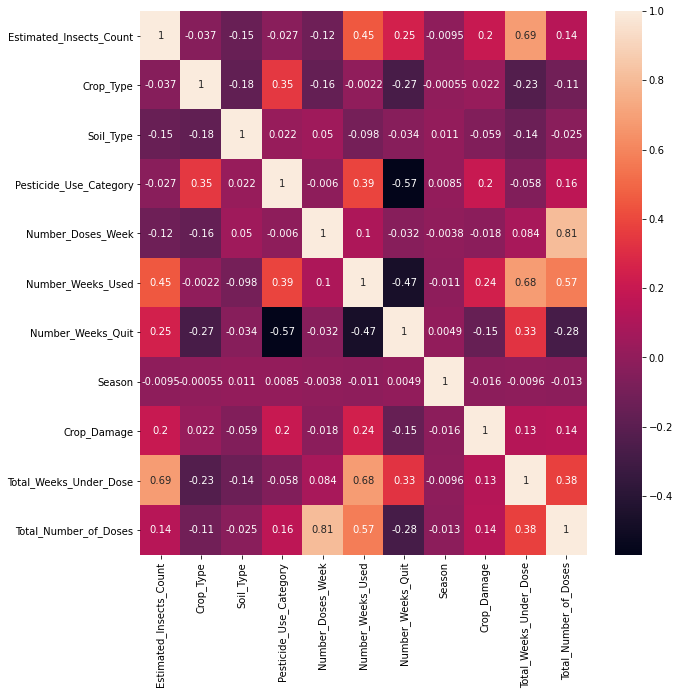

In [65]:
fig_this_size(10,10)
sns.heatmap(df.corr(),annot=True)

* There is 1 raw feature with missing values and 2 derived features with missing value.

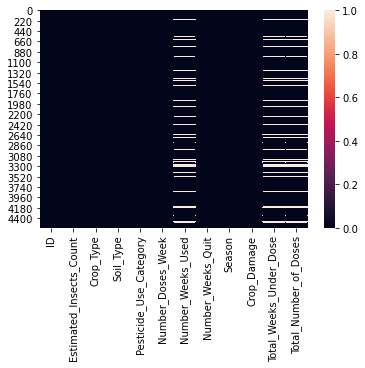

In [66]:
sns.heatmap(df.isna())

In [67]:
df.isna().mean()

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          0.096108
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                0.000000
Total_Weeks_Under_Dose     0.096108
Total_Number_of_Doses      0.096108
dtype: float64

* Missing values are around 10 percent in the dataset per feature.

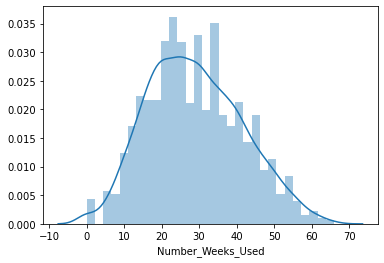

In [68]:
sns.distplot(df.Number_Weeks_Used)

In [69]:
from feature_engine.missing_data_imputers import EndTailImputer,RandomSampleImputer,MeanMedianImputer

In [70]:
imputing_methods = [EndTailImputer,RandomSampleImputer,MeanMedianImputer]

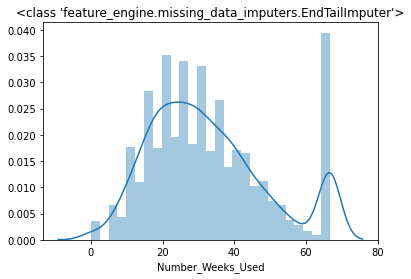

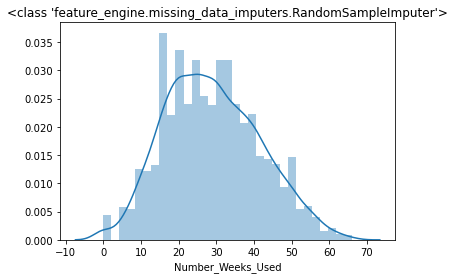

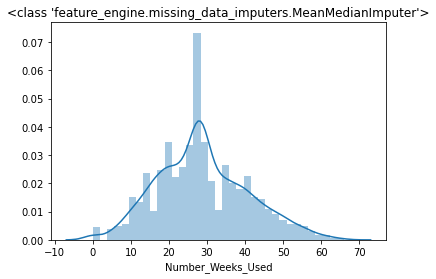

In [71]:
for method in imputing_methods:
    use_method = method(variables=['Number_Weeks_Used'])
    
    sns.distplot(use_method.fit_transform(df_cleaned)['Number_Weeks_Used'])
    plt.title(method)
    plt.show()

* We can see that the random sample imputer is giving us the best results, so let's finalize it as the imputation method

In [72]:
missing_features_list = []
for col in df_cleaned:
    if any(df[col].isna()) == True:
        missing_features_list.append(col)

In [73]:
missing_features_list

['Number_Weeks_Used', 'Total_Weeks_Under_Dose', 'Total_Number_of_Doses']

In [74]:
imputer = RandomSampleImputer(variables=missing_features_list)

In [75]:
df_cleaned = imputer.fit_transform(df_cleaned)

In [76]:
# sanity check!

In [77]:
df_cleaned.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
Total_Weeks_Under_Dose     0
Total_Number_of_Doses      0
dtype: int64

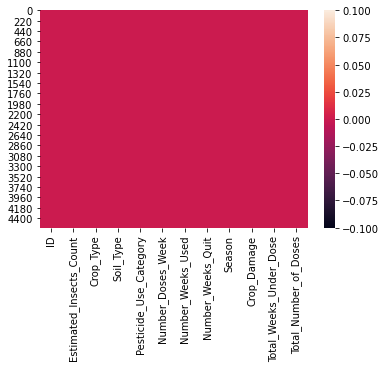

In [78]:
sns.heatmap(df_cleaned.isna())

In [79]:
# Let's remove the ID column as it is a redundant column.
df_cleaned.drop('ID',1,inplace=True)

## Removing the outliers

In [80]:
# checking for outliers:

In [81]:
# finding the numerical and the categorical features and putting them indifferent lists.
num_feat,cat_feat = [],[]
for col in df_cleaned:
    
    if len(df_cleaned[col].value_counts()) > 4:
        
        num_feat.append(col)
    else:
        cat_feat.append(col)

In [82]:
num_feat

['Estimated_Insects_Count',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Total_Weeks_Under_Dose',
 'Total_Number_of_Doses']

In [83]:
cat_feat

['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season', 'Crop_Damage']

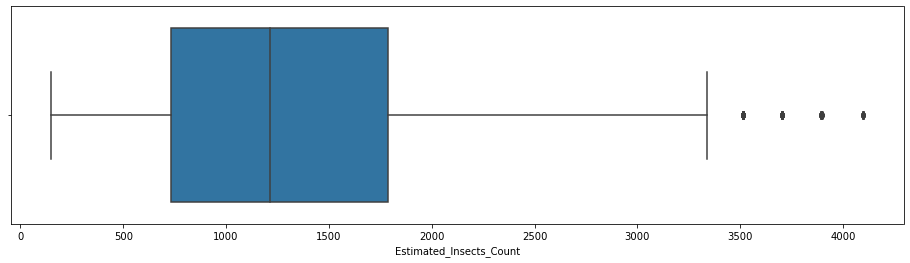

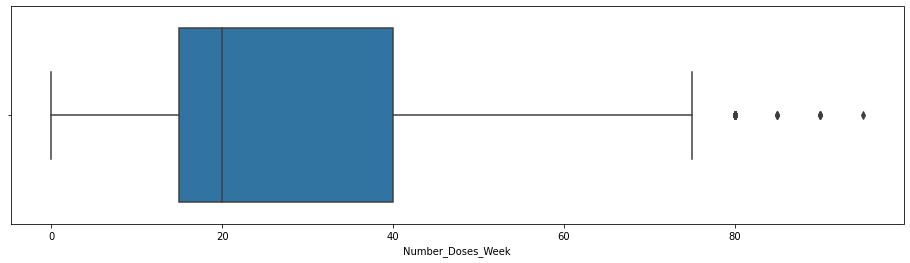

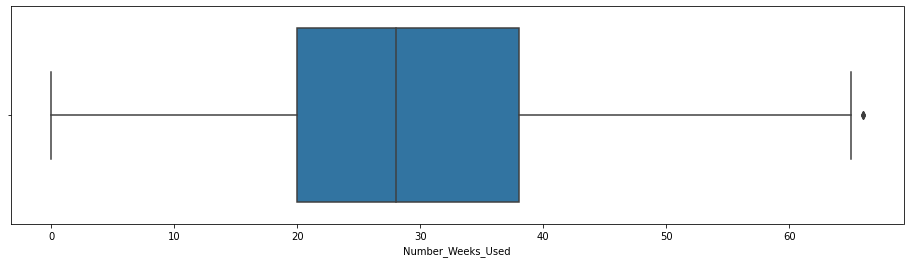

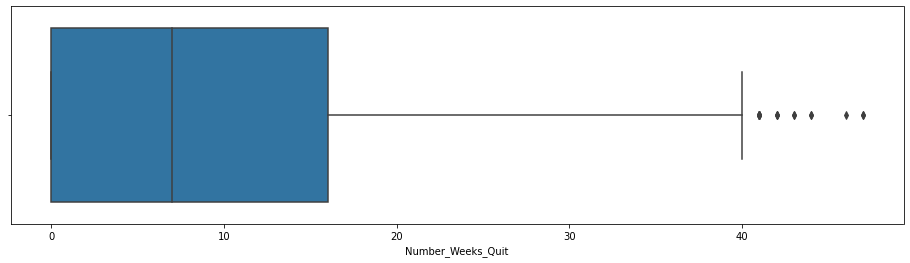

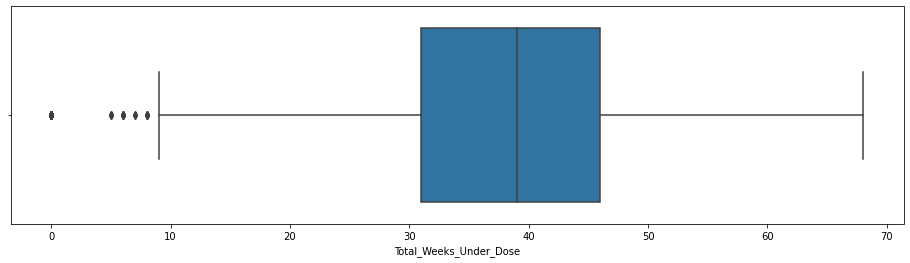

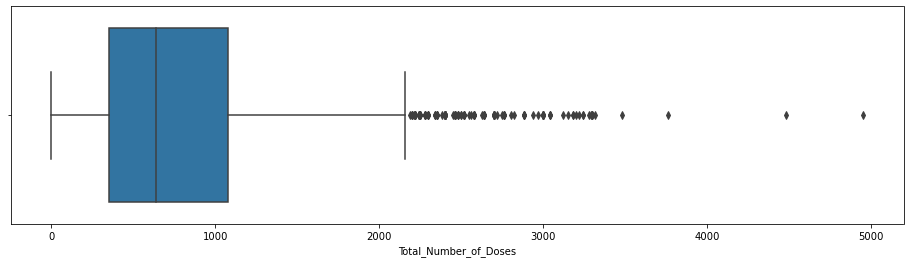

In [84]:
for col in num_feat:
    fig_this_size(16,4)
    sns.boxplot(df[col])

In [85]:
# addressing the outliers using z score

In [86]:
z_scores = stats.zscore(df_cleaned)

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]

In [87]:
len(df_cleaned)

4293

In [88]:
len(df)

4599

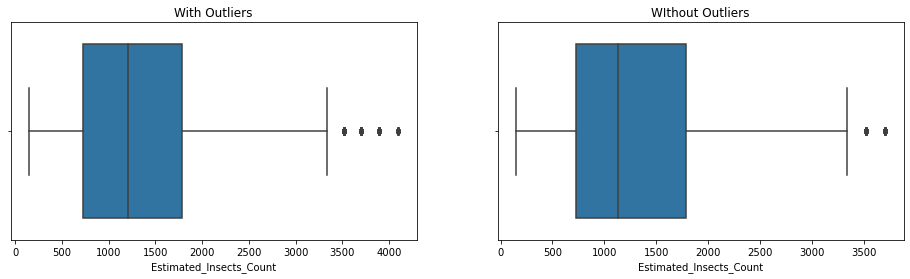

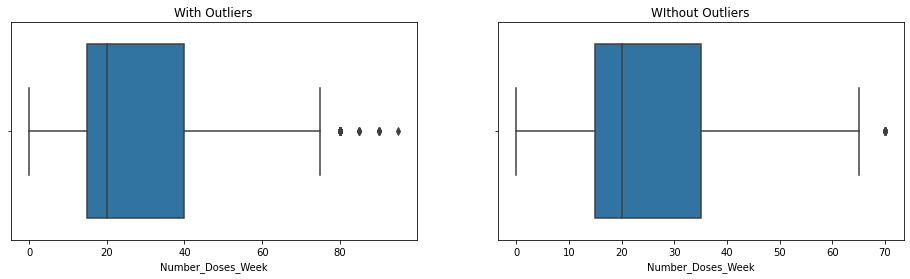

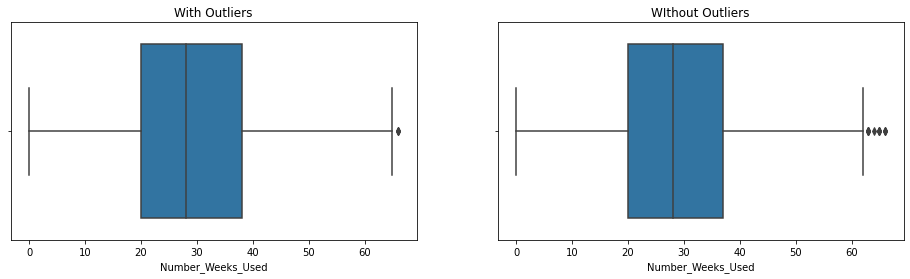

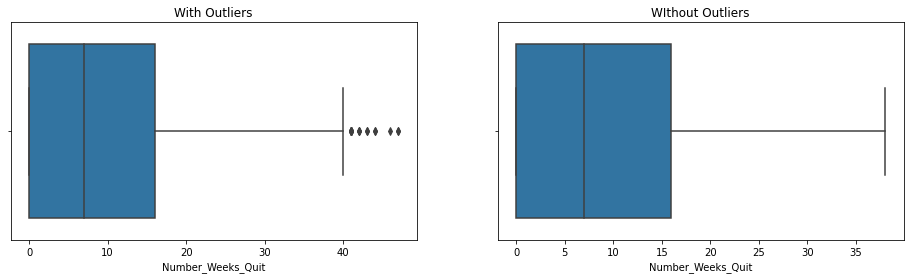

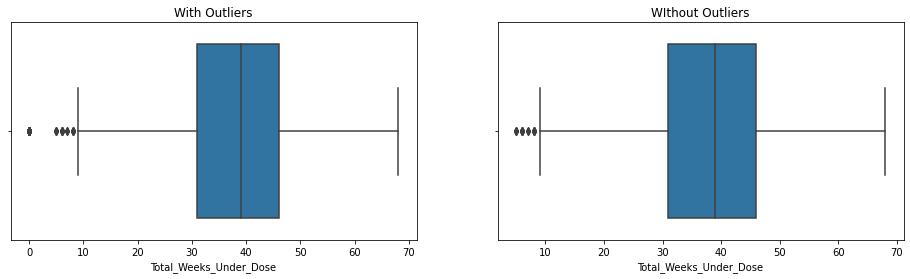

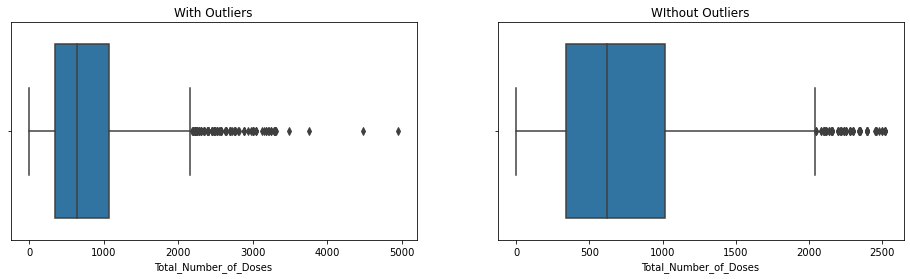

In [89]:
#outliers : before and after
for col in num_feat:
    
    fig = fig_this_size(16,4)
        
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('With Outliers')
        
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('WIthout Outliers')

## Skewness of the data

In [90]:
df_cleaned

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose,Total_Number_of_Doses
5,448,0,1,1,0,18.0,0,2,1,39.0,540.0
6,448,0,1,1,0,26.0,0,2,1,38.0,1680.0
10,1212,1,0,1,0,40.0,0,3,0,27.0,960.0
17,2401,0,1,1,0,23.0,0,1,1,57.0,270.0
24,150,0,0,3,30,26.0,0,2,0,26.0,780.0
...,...,...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,30.0,1,1,1,11.0,1800.0
4595,2139,0,1,2,30,47.0,2,1,1,49.0,1410.0
4596,2267,0,1,2,10,7.0,27,2,0,34.0,70.0
4597,2267,0,1,2,10,20.0,24,2,0,44.0,200.0


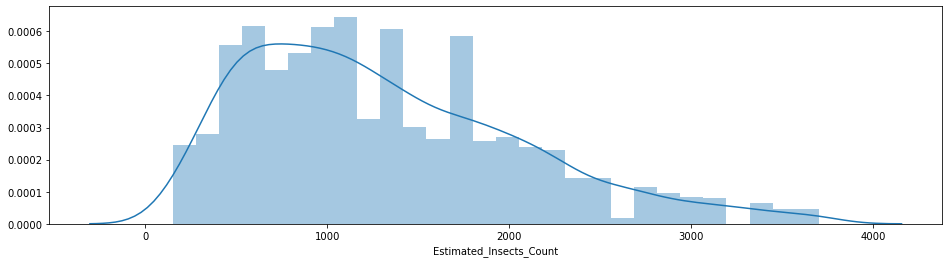

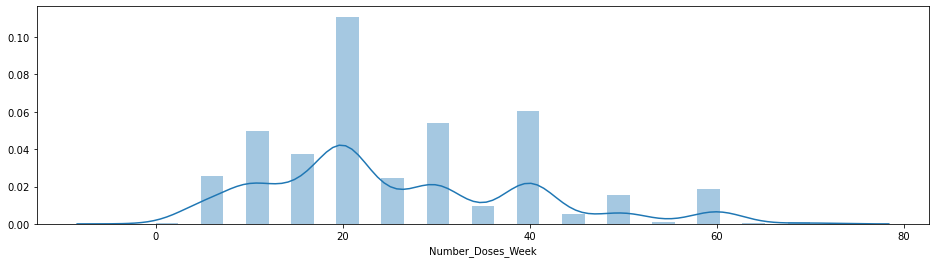

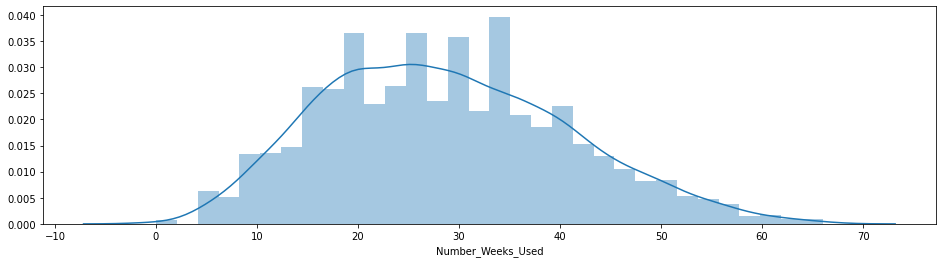

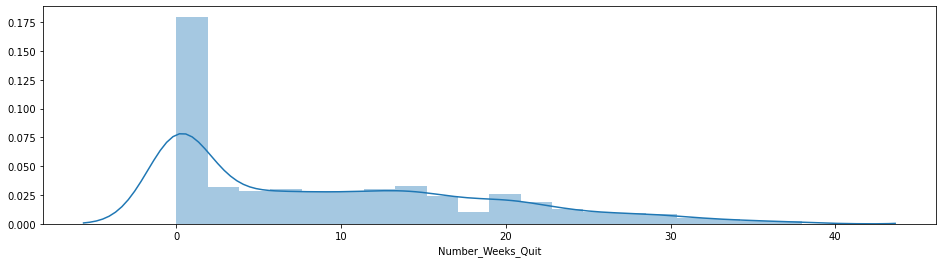

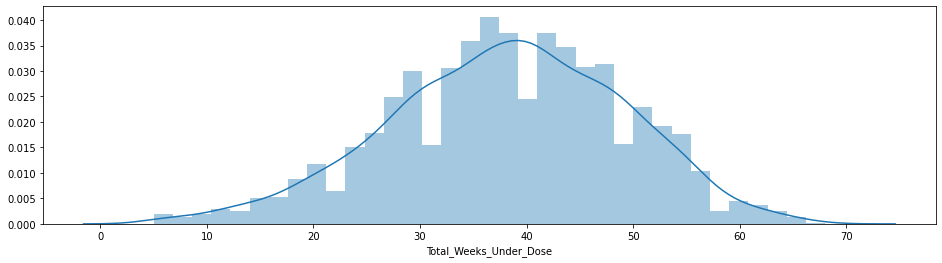

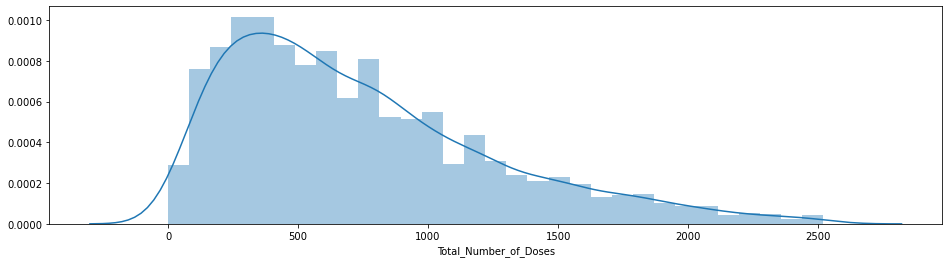

In [91]:
for col in num_feat:
    fig_this_size(16,4)
    sns.distplot(df_cleaned[col])

In [92]:
# skew stats:
df_cleaned[num_feat].skew()

Estimated_Insects_Count    0.805977
Number_Doses_Week          0.725631
Number_Weeks_Used          0.350273
Number_Weeks_Quit          0.796189
Total_Weeks_Under_Dose    -0.223597
Total_Number_of_Doses      1.001485
dtype: float64

In [93]:
# transforation

In [94]:
#try1: log transformation
np.log(df_cleaned[num_feat]+1).skew()

Estimated_Insects_Count   -0.533403
Number_Doses_Week         -0.608796
Number_Weeks_Used         -1.085679
Number_Weeks_Quit         -0.252186
Total_Weeks_Under_Dose    -1.440078
Total_Number_of_Doses     -1.145797
dtype: float64

In [95]:
#try2 : Sqrt transformation
np.sqrt(df_cleaned[num_feat]).skew()

Estimated_Insects_Count    0.191586
Number_Doses_Week          0.092394
Number_Weeks_Used         -0.245093
Number_Weeks_Quit         -0.009414
Total_Weeks_Under_Dose    -0.749100
Total_Number_of_Doses      0.250265
dtype: float64

In [96]:
# square transformationsis working just fine
# let's finalize that.

In [97]:
df_cleaned[num_feat] = np.sqrt(df_cleaned[num_feat])

In [98]:
# before and after : skewness

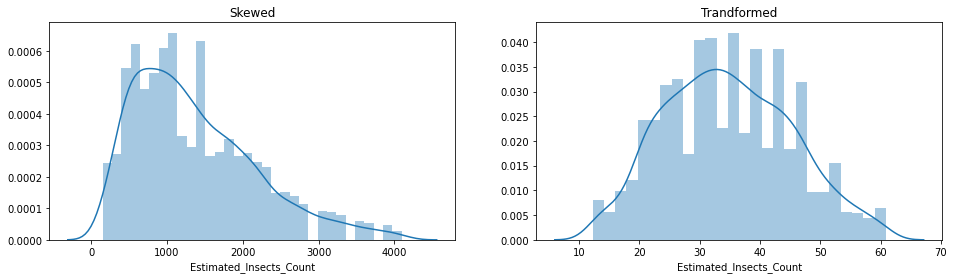

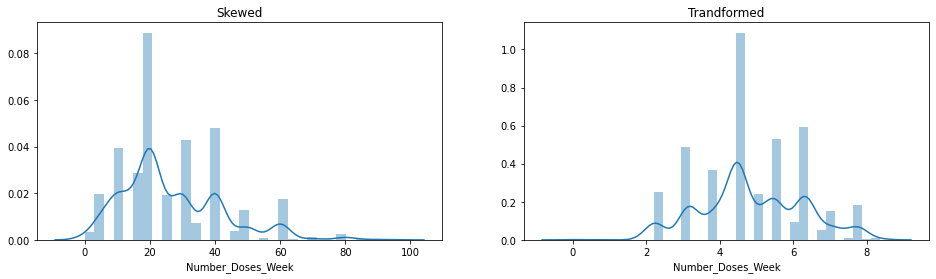

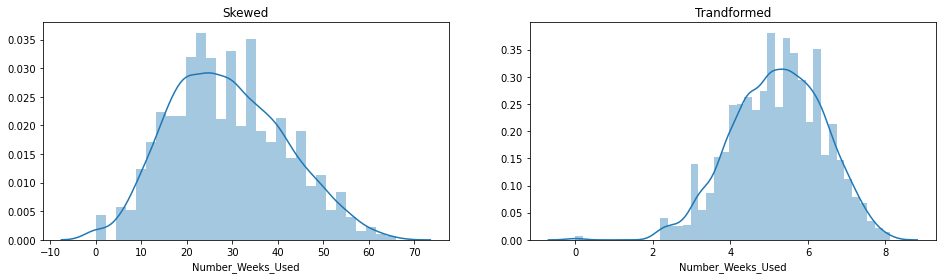

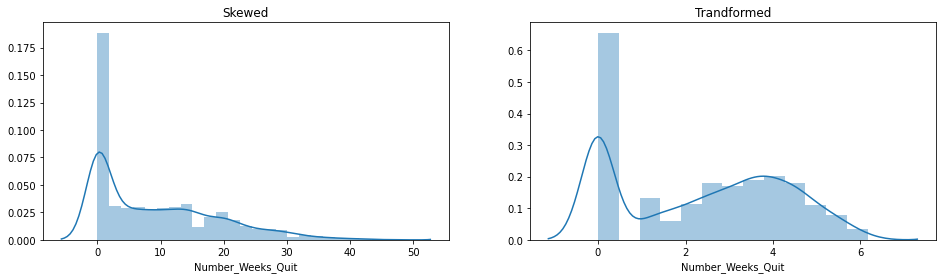

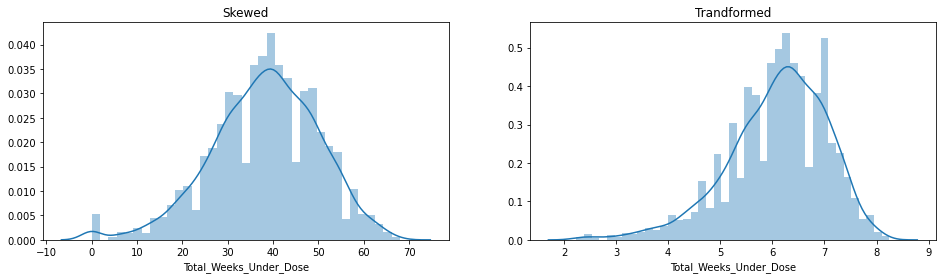

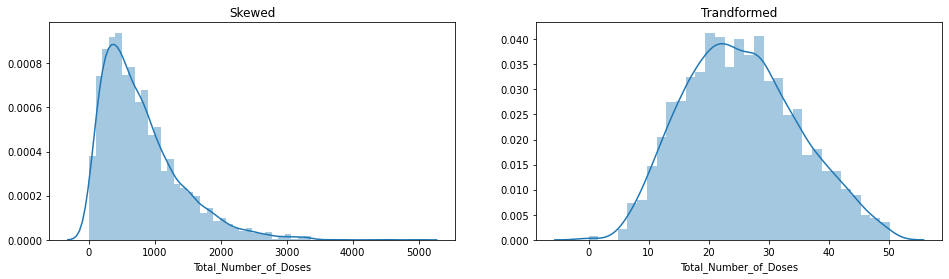

In [99]:
for col in num_feat:
    
    fig = fig_this_size(16,4)
        
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Skewed')
        
    fig.add_subplot(122)
    sns.distplot(df_cleaned[col])
    plt.title('Trandformed')

* The second columns much better than the first column.

In [100]:
df_cleaned

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose,Total_Number_of_Doses
5,21.166010,0,1,1,0.000000,4.242641,0.000000,2,1,6.244998,23.237900
6,21.166010,0,1,1,0.000000,5.099020,0.000000,2,1,6.164414,40.987803
10,34.813790,1,0,1,0.000000,6.324555,0.000000,3,0,5.196152,30.983867
17,49.000000,0,1,1,0.000000,4.795832,0.000000,1,1,7.549834,16.431677
24,12.247449,0,0,3,5.477226,5.099020,0.000000,2,0,5.099020,27.928480
...,...,...,...,...,...,...,...,...,...,...,...
4594,46.238512,0,1,2,4.472136,5.477226,1.000000,1,1,3.316625,42.426407
4595,46.249324,0,1,2,5.477226,6.855655,1.414214,1,1,7.000000,37.549967
4596,47.613023,0,1,2,3.162278,2.645751,5.196152,2,0,5.830952,8.366600
4597,47.613023,0,1,2,3.162278,4.472136,4.898979,2,0,6.633250,14.142136


## Feature Variable Split

In [101]:
X = df_cleaned.drop('Crop_Damage',1)
y = df_cleaned['Crop_Damage']

In [102]:
# checking theshape

In [103]:
X.shape,y.shape

((4293, 10), (4293,))

## Train Validation Split

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [105]:
# again the shapes
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((3005, 10), (3005,), (1288, 10), (1288,))

## Building the model

In [106]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [107]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [108]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_val,y_val))
    print('Test_Acc:', model.score(X_val,y_val))
    print('Recall:', recall_score(y_val,model.predict(X_val)))
    print('Precision:',recall_score(y_val,model.predict(X_val)))
    print('F1:',recall_score(y_val,model.predict(X_val)))

    

In [109]:
#try1: Logistic Regression
train_n_ret_scores(LogisticRegression())

Train_Acc: 0.8555900621118012
Test_Acc: 0.8555900621118012
Recall: 0.10326086956521739
Precision: 0.10326086956521739
F1: 0.10326086956521739


In [110]:
#try2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.8571428571428571
Test_Acc: 0.8571428571428571
Recall: 0.0
Precision: 0.0
F1: 0.0


In [111]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.8369565217391305
Test_Acc: 0.8369565217391305
Recall: 0.13043478260869565
Precision: 0.13043478260869565
F1: 0.13043478260869565


In [112]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.8369565217391305
Test_Acc: 0.8369565217391305
Recall: 0.13043478260869565
Precision: 0.13043478260869565
F1: 0.13043478260869565


In [113]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 0.7732919254658385
Test_Acc: 0.7732919254658385
Recall: 0.28804347826086957
Precision: 0.28804347826086957
F1: 0.28804347826086957


In [114]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 0.8322981366459627
Test_Acc: 0.8322981366459627
Recall: 0.14673913043478262
Precision: 0.14673913043478262
F1: 0.14673913043478262


In [115]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.8478260869565217
Test_Acc: 0.8478260869565217
Recall: 0.10326086956521739
Precision: 0.10326086956521739
F1: 0.10326086956521739


In [116]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.843944099378882
Test_Acc: 0.843944099378882
Recall: 0.07065217391304347
Precision: 0.07065217391304347
F1: 0.07065217391304347


In [117]:
#try7: Adaboost with Logistic
train_n_ret_scores(AdaBoostClassifier(base_estimator=LogisticRegression()))

Train_Acc: 0.8532608695652174
Test_Acc: 0.8532608695652174
Recall: 0.07608695652173914
Precision: 0.07608695652173914
F1: 0.07608695652173914


In [118]:
# Let's create a dataframe with all the models in it

In [119]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_val,y_val)
    prec = precision_score(y_val,y_preds,average='micro')
    rec = recall_score(y_val,y_preds,average='micro')
    f1 = f1_score(y_val,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [120]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.860233,0.855590,0.855590,0.855590,0.855590,0.860233
1,SVC,0.861897,0.857143,0.857143,0.857143,0.857143,0.861897
2,KNN,0.876872,0.836957,0.836957,0.836957,0.836957,0.834609
3,Random_forest,0.999667,0.772516,0.772516,0.772516,0.772516,0.770050
4,Decision_Treee,0.999667,0.833075,0.833075,0.833075,0.833075,0.853910
5,Gradient_boost,0.891514,0.843944,0.843944,0.843944,0.843944,0.856905
6,Adaboost,0.999667,0.840062,0.840062,0.840062,0.840062,0.852579


In [121]:
# Our good ol' Logistic Regression for the win.

In [122]:
# let's finalize the Logistic Regression

In [123]:
best_model = LogisticRegression()

In [124]:
best_model.fit(X_train,y_train)

LogisticRegression()

In [125]:
y_preds = best_model.predict(X_val)

In [126]:
train_n_ret_scores(best_model)

Train_Acc: 0.8555900621118012
Test_Acc: 0.8555900621118012
Recall: 0.10326086956521739
Precision: 0.10326086956521739
F1: 0.10326086956521739


In [127]:
# Saving the best model

In [128]:
import joblib

In [129]:
joblib.dump(best_model,'Agriculture.pkl')

['Agriculture.pkl']